In [1]:
import pandas as pd
import numpy as np

from pathlib import Path 

In [2]:
tables_path = Path('data', 'tables')
df = pd.read_csv(tables_path / 'merged_award_show_winners.csv', keep_default_na=False, na_values=[''])
df.head()

,Show,Date,Artist,Song,Total,Placement,file_path,vggish_dance,vggish_party,vggish_happy,vggish_sad,effnet_party,effnet_happy,effnet_sad,effnet_approachability,effnet_engagement,effnet_timbre_bright,tempo
0,Music Bank,2022-01-07,NCT U,Universe (Let's Play Ball),5930,1,data/audio/universe_(let's_play_ball)_nct_u.flac,90.834355,24.404429,69.484723,76.007283,1.950100,47.702590,92.827344,84.677964,96.713340,50.498027,90.0
1,Show! Music Core,2022-01-08,IVE,ELEVEN,6408,1,data/audio/eleven_ive.flac,94.969481,14.487433,81.253177,86.618626,2.623723,44.954056,88.753748,91.413623,92.127520,51.922780,120.0
2,Inkigayo,2022-01-09,IVE,ELEVEN,8533,1,data/audio/eleven_ive.flac,94.969481,14.487433,81.253177,86.618626,2.623723,44.954056,88.753748,91.413623,92.127520,51.922780,120.0
3,M Countdown,2022-01-13,Kep1er,WA DA DA,6500,1,data/audio/wa_da_da_kep1er.flac,96.806103,8.892013,78.541768,93.300325,1.427681,66.826451,95.882249,71.226579,97.789687,49.050614,126.0
4,Music Bank,2022-01-14,Kep1er,WA DA DA,3678,1,data/audio/wa_da_da_kep1er.flac,96.806103,8.892013,78.541768,93.300325,1.427681,66.826451,95.882249,71.226579,97.789687,49.050614,126.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Winner'] = (df.Placement == 1).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Show                    1710 non-null   object        
 1   Date                    1710 non-null   datetime64[ns]
 2   Artist                  1710 non-null   object        
 3   Song                    1710 non-null   object        
 4   Total                   1710 non-null   int64         
 5   Placement               1710 non-null   int64         
 6   file_path               1710 non-null   object        
 7   vggish_dance            1710 non-null   float64       
 8   vggish_party            1710 non-null   float64       
 9   vggish_happy            1710 non-null   float64       
 10  vggish_sad              1710 non-null   float64       
 11  effnet_party            1710 non-null   float64       
 12  effnet_happy            1710 non-null   float64 

## Initial Inspections

In this section, I want to explore some basic insights found within the data such as what group has the most wins, who is always on the cusp of achieving their first win, and the trends within the total amount of votes observed within certain time periods. Most of this analysis will likely pertain to the first 6 columns: `Show`, `Date`, `Artist`, `Song`, `Total`, and `Winner`

In [4]:
most_wins = df[df.Placement == 1].groupby('Artist')['Placement'].sum().sort_values(ascending=False)
display(most_wins[:10])

Artist
IVE            64
(G)I-DLE       42
NewJeans       35
LE SSERAFIM    34
aespa          28
SEVENTEEN      26
STRAY KIDS     26
NCT DREAM      23
ATEEZ          19
Jung Kook      18
Name: Placement, dtype: int64

In [5]:
never_won_filter = (df.Placement != 1) & (~df.Artist.isin(most_wins.keys()))
never_won = df.loc[never_won_filter] \
    .groupby('Artist')['Placement'] \
    .count() \
    .sort_values(ascending=False)

So far, we have a great understanding of which artists are highly decorated in music show wins and artists that have yet achieved their coveted win. In terms of artists with the most wins, there are no surprises as this list is dominated by the most popular 4th generation BGs and GGs. For artists that haven't won, we can observe several 5th generation groups such as YOUNG POSSE, RESCENE, MEOWV whom are barely starting their careers in KPOP so there is definitely potential for them to find a win within the coming years. Additionally, we can observe that it's a bit of a struggle for solo artists to obtain a win. With the exception of ROSÉ because she won with APT with Bruno Mars, winning at a music show can be difficult despite an idol's popularity. For example, veterans such as Wendy, Lee Chae-yeon, and Tzuyu are well-known female idols that come from very popular groups (Red Velvet, ex-Izone, Twice respectively) but haven't been able to acquire awards. Next, I want to observe music show wins on a monthly basis

In [6]:
columns_to_drop = ['file_path', 'vggish_dance', 'vggish_party', 'vggish_happy', 'vggish_sad', 'effnet_party', 
                   'effnet_happy', 'effnet_sad', 'effnet_approachability', 'effnet_engagement', 'effnet_timbre_bright', 'tempo']

# Track the cumulative wins for a given group
df_stats = df.copy().sort_values(by='Date').reset_index(drop=True)
df_stats = df_stats.drop(columns=columns_to_drop)

df_stats['cumulative_wins'] = df_stats.groupby('Artist')['Winner'].cumsum()

df_stats.tail(10)

,Show,Date,Artist,Song,Total,Placement,Winner,cumulative_wins
1700,M Countdown,2025-04-10,LE SSERAFIM,HOT,4930,2,0,33
1701,Music Bank,2025-04-11,CLOSE YOUR EYES,All My Poetry,5507,1,1,2
1702,Show! Music Core,2025-04-12,JENNIE,like JENNIE,6095,1,1,7
1703,The Show,2025-04-15,izna,Sign,8450,1,1,1
1704,Show Champion,2025-04-16,Mark,1999,5592,1,1,1
1705,M Countdown,2025-04-17,J-Hope,MONA LISA,7643,1,1,4
1706,Music Bank,2025-04-18,Mark,1999,9606,1,1,2
1707,Show! Music Core,2025-04-19,Mark,1999,7159,1,1,3
1708,Inkigayo,2025-04-20,LE SSERAFIM,HOT,4556,1,1,34
1709,Show Champion,2025-04-23,UNIS,Swicy,6467,1,1,1


In [7]:
most_wins[:15]

Artist
IVE            64
(G)I-DLE       42
NewJeans       35
LE SSERAFIM    34
aespa          28
SEVENTEEN      26
STRAY KIDS     26
NCT DREAM      23
ATEEZ          19
Jung Kook      18
STAYC          18
BLACKPINK      17
G-Dragon       16
ZEROBASEONE    15
THE BOYZ       15
Name: Placement, dtype: int64

In [8]:
# Gather the top 5 Artists relative to wins
top_5_artists = most_wins.keys()[:5]
top_5 = df_stats.loc[df_stats.Artist.isin(top_5_artists)]
top_5_wins = top_5.loc[top_5.Placement == 1]
first_wins = top_5_wins.groupby(['Artist', 'Song'])['Date'].min().to_dict()

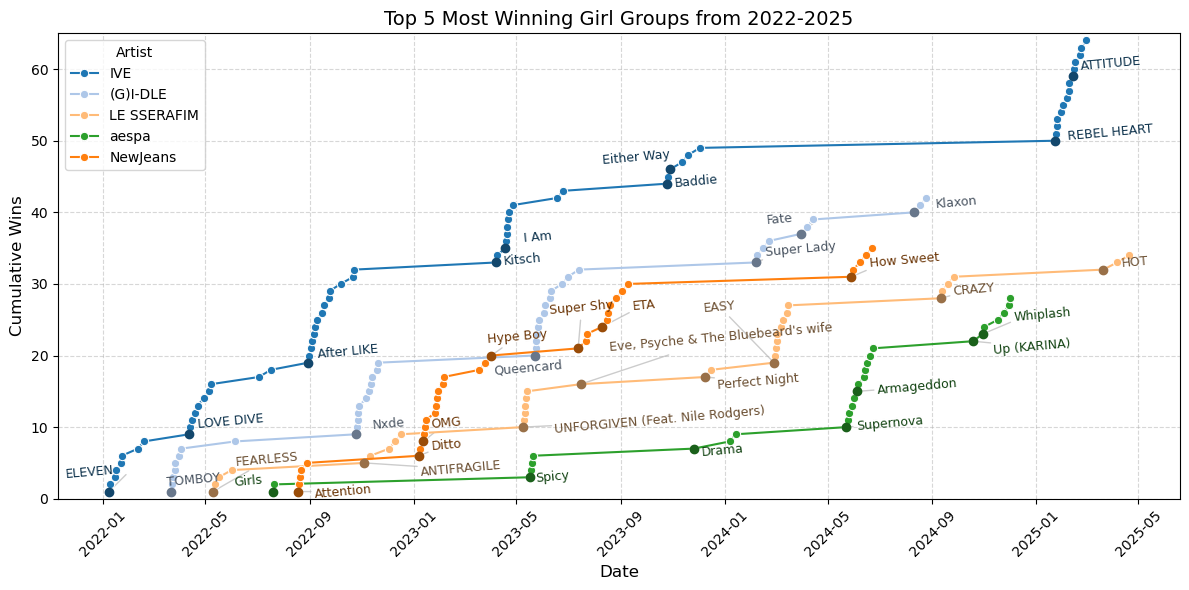

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Function for darkening scatter points and text
def darken(color, factor=0.6):
    return tuple([max(0, min(1, c*factor)) for c in color])

plt.figure(figsize=(12, 6))
palette = sns.color_palette('tab20', n_colors=5)
artist_colors = dict(zip(top_5_artists, palette))

sns.lineplot(data=top_5_wins, x='Date', y='cumulative_wins', hue='Artist', marker='o', palette=artist_colors)

# Place the text and point to denote a song's first win
texts = []
for (artist, song), win_date in first_wins.items():
    song_data = top_5_wins[(top_5_wins['Artist'] == artist) & (top_5_wins['Date'] == win_date)]
    win_score = song_data['cumulative_wins'].values[0]
    song = song_data['Song'].values[0]
    darker_color = darken(artist_colors[artist], 0.6)

    plt.scatter(win_date, win_score, color=darker_color, zorder=5)
    texts.append(plt.text(win_date, win_score, f'{song}', fontsize=9, rotation=5.1, color=darken(darker_color, .7), zorder=6))

# Make automatic adjustments
adjust_text(texts, only_move={'text': 'xy'}, 
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.4)
            )

# Manual Text Adjustments
for text in texts:
    if text.get_text() in ['ELEVEN', 'Girls', 'Fate']:
        text.set_position((text.get_position()[0] - (pd.Timedelta(days=45)/pd.Timedelta(days=1)), text.get_position()[1]))
    elif text.get_text() in 'Either Way':
        text.set_position((text.get_position()[0] - (pd.Timedelta(days=90)/pd.Timedelta(days=1)), text.get_position()[1]))
    elif text.get_text() in ['HOT', 'I Am', 'Whiplash', 'Queencard', 'How Sweet', 'Klaxon', 'Super Lady', 'Nxde']:
        text.set_position((text.get_position()[0] + (pd.Timedelta(days=16)/pd.Timedelta(days=1)), text.get_position()[1]))


plt.xticks(rotation=45)
plt.ylim(0, max(top_5_wins.cumulative_wins + 1))

plt.title('Top 5 Most Winning Girl Groups from 2022-2025', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Wins', fontsize=12)

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The plot above details the **Top 5 Most Winning** groups from 2022 to the present which happens to all be girl groups. Evidenced by the prior table listing the top 15 most winningest artists, there appears to be a large concentration of wins even amongst the top 5 alone.

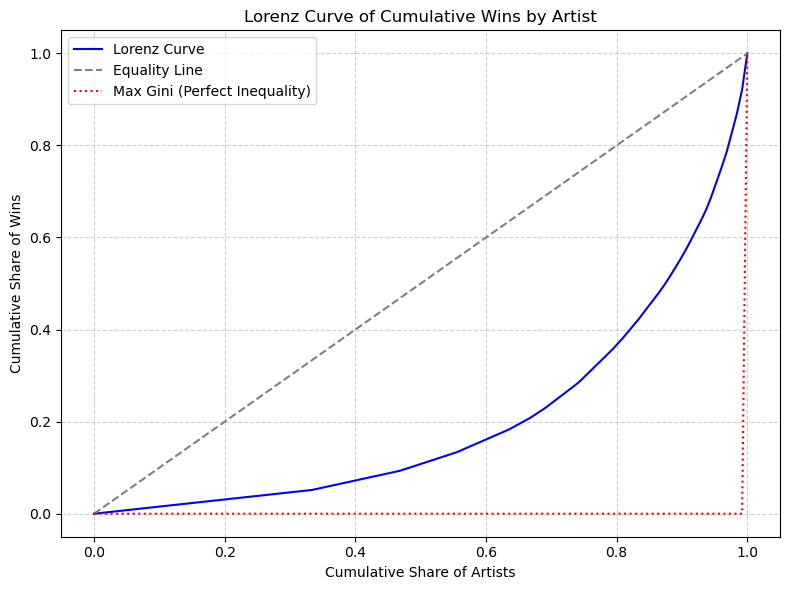

Gini Coefficient: 0.59


In [10]:
# Cumulative Share of Wins by Top N
cumulative_wins = most_wins.sort_values().cumsum()
cumulative_artists = np.arange(1, len(cumulative_wins) + 1)

# Normalize and Prepend 0
lorenz_x = np.insert(cumulative_artists / cumulative_artists.max(), 0, 0)
lorenz_y = np.insert(cumulative_wins / cumulative_wins.max(), 0, 0)

plt.figure(figsize=(8, 6))

# Plot Lorenz Curve
plt.plot(lorenz_x, lorenz_y, label="Lorenz Curve", color='blue')

# Plot equality line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Equality Line')

# Max Gini line: all artists have 0 until the last one
max_gini_x = [0, 1 - 1/len(most_wins), 1]
max_gini_y = [0, 0, 1]
plt.plot(max_gini_x, max_gini_y, linestyle=':', color='red', label='Max Gini (Perfect Inequality)')

plt.title("Lorenz Curve of Cumulative Wins by Artist")
plt.xlabel("Cumulative Share of Artists")
plt.ylabel("Cumulative Share of Wins")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Gini coefficient = area between equality line and Lorenz curve * 2
lorenz_area = np.trapz(lorenz_y, lorenz_x)
gini = 1 - 2 * lorenz_area
print(f"Gini Coefficient: {gini:.2f}")

As shown by the Gini Coefficient, the distribution of wins is moderately inequal (0.59). This is further evidenced by the curve sitting in between the lines of equality and inequality.

In [11]:
df_song = df_stats.copy()
df_song['cumulative_song_wins'] = df_song.groupby(['Artist', 'Song'])['Winner'].cumsum()
df_song.tail(10)

,Show,Date,Artist,Song,Total,Placement,Winner,cumulative_wins,cumulative_song_wins
1700,M Countdown,2025-04-10,LE SSERAFIM,HOT,4930,2,0,33,2
1701,Music Bank,2025-04-11,CLOSE YOUR EYES,All My Poetry,5507,1,1,2,2
1702,Show! Music Core,2025-04-12,JENNIE,like JENNIE,6095,1,1,7,5
1703,The Show,2025-04-15,izna,Sign,8450,1,1,1,1
1704,Show Champion,2025-04-16,Mark,1999,5592,1,1,1,1
1705,M Countdown,2025-04-17,J-Hope,MONA LISA,7643,1,1,4,2
1706,Music Bank,2025-04-18,Mark,1999,9606,1,1,2,2
1707,Show! Music Core,2025-04-19,Mark,1999,7159,1,1,3,3
1708,Inkigayo,2025-04-20,LE SSERAFIM,HOT,4556,1,1,34,3
1709,Show Champion,2025-04-23,UNIS,Swicy,6467,1,1,1,1


In [12]:
artists_per_winning = df.groupby('Artist').agg(
    total_wins=('Winner', 'sum'),
    total_appearances=('Date', 'count'),
    total_songs=('Song', 'nunique')
)

artists_per_winning['win_ratio'] = artists_per_winning['total_wins'] / artists_per_winning['total_appearances']
artists_per_winning['avg_wins_per_song'] = artists_per_winning['total_wins'] / artists_per_winning['total_songs']
artists_per_winning

,total_wins,total_appearances,total_songs,win_ratio,avg_wins_per_song
Artist,,,,,
(G)I-DLE,42,70,7,0.600000,6.0
82MAJOR,0,1,1,0.000000,0.0
8TURN,0,2,2,0.000000,0.0
A.C.E,0,1,1,0.000000,0.0
AB6IX,1,2,2,0.500000,0.5
...,...,...,...,...,...
fromis_9,12,17,4,0.705882,3.0
izna,1,3,2,0.333333,0.5
n.SSign,1,8,5,0.125000,0.2


In [13]:
artists_per_winning.sort_values(['win_ratio', 'avg_wins_per_song'], ascending=False).head(10)

,total_wins,total_appearances,total_songs,win_ratio,avg_wins_per_song
Artist,,,,,
BIGBANG,9,9,1,1.0,9.0
BLACKPINK,17,17,2,1.0,8.5
PSY,7,7,1,1.0,7.0
ASTRO,4,4,1,1.0,4.0
GOT the beat,3,3,1,1.0,3.0
Mark,3,3,1,1.0,3.0
BtoB,2,2,1,1.0,2.0
Kai,2,2,1,1.0,2.0
LOONA,2,2,1,1.0,2.0


In [14]:
def wins_within_date_range(df, show='all', date_start='2022-01-01', date_end='3005-01-01'):
    date_range_filter = (df.Date >= date_start) & (df.Date <= date_end)

    # Determine show filter
    if show == 'all':
        show_filter = True
    elif show in df['Show'].unique():
        show_filter = (df['Show'] == show)
    else:
        print(f"Warning: '{show}' is not a recognized show. Returning empty result.\nValid shows are: {df.Show.unique().tolist()}")
        return pd.DataFrame(columns=[
            'total_wins', 'total_appearances', 'total_comebacks',
            'win_ratio', 'avg_wins_per_comeback'
        ])
    
    artists_per_winning = df[(date_range_filter) & (show_filter)].groupby('Artist').agg(
        total_wins=('Winner', 'sum'),
        total_appearances=('Date', 'count'),
        total_comebacks=('Song', 'nunique')
    )

    artists_per_winning['win_ratio'] = artists_per_winning['total_wins'] / artists_per_winning['total_appearances']
    artists_per_winning['avg_wins_per_comeback'] = artists_per_winning['total_wins'] / artists_per_winning['total_comebacks']
    return artists_per_winning.sort_values(['win_ratio', 'avg_wins_per_comeback'], ascending=False)

In [15]:
wins_within_date_range(df, date_start='2025-01-01', date_end='2025-04-24', show="Music Bank").head(10)

,total_wins,total_appearances,total_comebacks,win_ratio,avg_wins_per_comeback
Artist,,,,,
BSS,1,1,1,1.0,1.0
CLOSE YOUR EYES,1,1,1,1.0,1.0
EVNNE,1,1,1,1.0,1.0
Eunhyuk,1,1,1,1.0,1.0
LE SSERAFIM,1,1,1,1.0,1.0
MINNIE,1,1,1,1.0,1.0
Mark,1,1,1,1.0,1.0
NMIXX,1,1,1,1.0,1.0
ONF,1,1,1,1.0,1.0


In [16]:
most_winning_comeback = df_song.copy()
most_winning_comeback = most_winning_comeback.loc[(most_winning_comeback.groupby('Artist')['cumulative_song_wins'].idxmax())]
most_winning_comeback = most_winning_comeback[most_winning_comeback.cumulative_song_wins > 0].sort_values('cumulative_song_wins', ascending=False).reset_index(drop=True)
most_winning_comeback

,Show,Date,Artist,Song,Total,Placement,Winner,cumulative_wins,cumulative_song_wins
0,Inkigayo,2022-10-23,IVE,After LIKE,7038,1,1,32,14
1,Music Bank,2023-07-14,(G)I-DLE,Queencard,5154,1,1,32,13
2,Music Bank,2023-11-10,Jung Kook,Seven (feat. Latto),9776,1,1,17,13
3,Inkigayo,2024-05-05,ILLIT,Magnetic,6640,1,1,12,12
4,Show! Music Core,2025-03-29,G-Dragon,TOO BAD (feat. Anderson Paak),6893,1,1,16,10
...,...,...,...,...,...,...,...,...,...
121,Music Bank,2024-10-11,VANNER,Automatic,6788,1,1,1,1
122,The Show,2023-06-06,AB6IX,LOSER,8300,1,1,1,1
123,The Show,2025-04-15,izna,Sign,8450,1,1,1,1
124,Music Bank,2025-01-10,n.SSign,Love Potion,7525,1,1,1,1


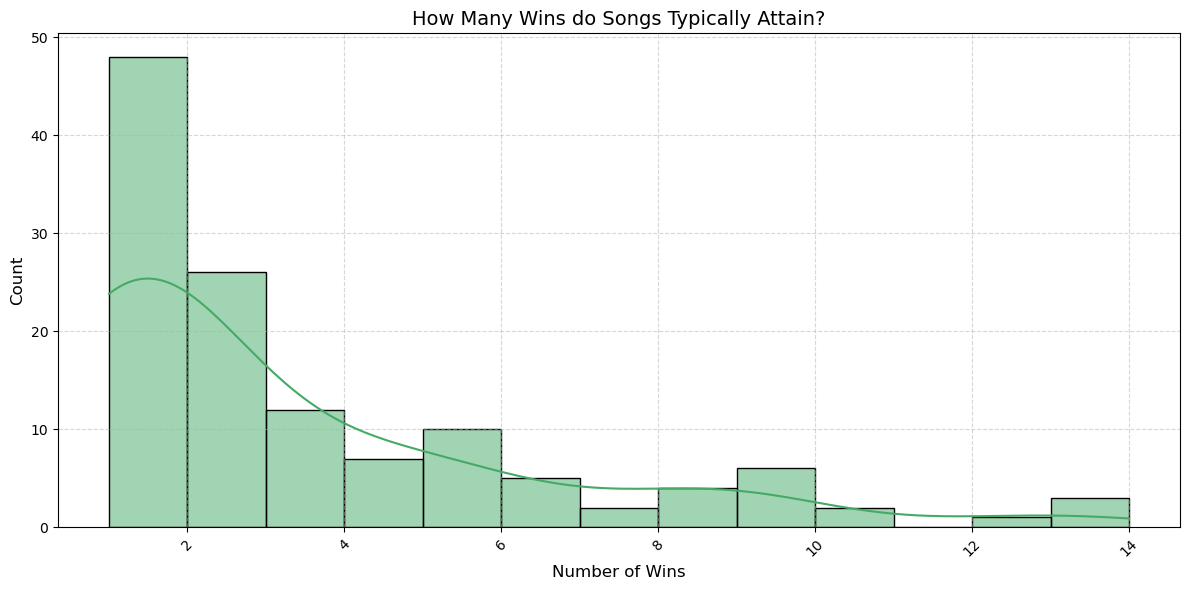

In [17]:
plt.figure(figsize=(12,6))

sns.histplot(data=most_winning_comeback, x="cumulative_song_wins", stat='count', binwidth=1, kde=True, color="#44AA66")

plt.xticks(rotation=45)
# plt.xlim(left = 1, right = most_winning_comeback.cumulative_song_wins.max())

plt.title("How Many Wins do Songs Typically Attain?", fontsize=14)
plt.xlabel("Number of Wins", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

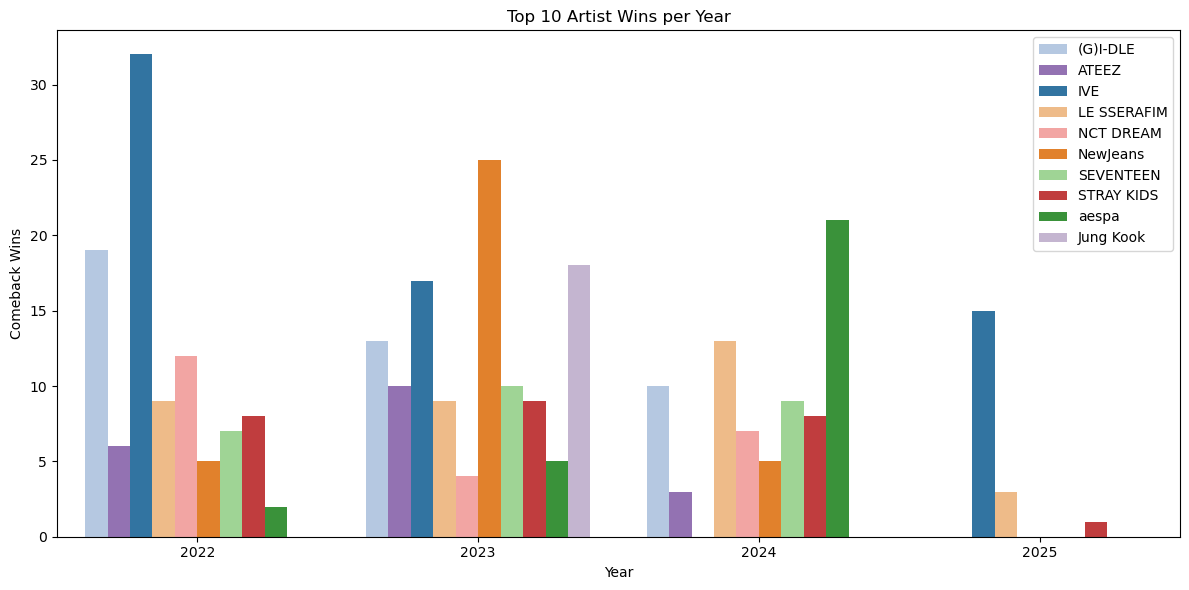

In [18]:
top_10_artists = most_wins.keys()[:10]
top_10_yearly = df_stats.loc[df_stats.Artist.isin(top_10_artists)].copy()
top_10_yearly['Year'] = top_10_yearly['Date'].dt.year


yearly_wins = top_10_yearly.groupby(['Year', 'Artist'])['Winner'].sum().reset_index(name='Win_Count')

plt.figure(figsize=(12, 6))
top_10_palette = sns.color_palette('tab20', n_colors=10)
t10_artist_colors = dict(zip(top_10_artists, top_10_palette))

sns.barplot(data=yearly_wins, x='Year', y='Win_Count', hue='Artist', palette=t10_artist_colors)
plt.title("Top 10 Artist Wins per Year")
plt.xlabel("Year")
plt.ylabel("Comeback Wins")
plt.legend()
plt.tight_layout()
plt.show()

The plot above draws some interesting insights, particularly the different years/eras that certain groups saw the most success in their career so far. Despite being 1/4 of the way into 2025, we can see that **IVE** has returned to its winning nature after a winless 2024. Their success is rivalling/matching their successful 2023 and there's potential for them to win more as we can expect a comeback from them near the middle to later portion of the year. 

We can also see that boy groups (BG) have been shown fairly consistent results; boy don't particularly have breakout years that we observe from girl groups but their consistency is definitely a testament to their fanbase showing out when they do release comebacks. Another instance where an artist's fanbase showed out is Jung Kook, where his 2023 solo debut skyrocketed both charts and garnered a ton of hardware along the way. Achieving music show wins are quite difficult especially if you're a solo act and going against the best of the best.

Lastly, we can observe who in the top 10 most winning artists had a breakout, monsterous year. In 2022, IVE notably swept music award shows and won Song of the Year with their track *LOVE DIVE*. 

Next, I would like to explore the winning margins that award shows have witnessed throughout the years.

In [19]:
first_places = df_stats[df_stats.Placement == 1][['Show', 'Date', 'Artist', 'Song', 'Total']].rename(columns={'Total': 'First_Total', 'Song': 'First_Song', 'Artist': 'First_Artist'})
second_places = df_stats[df_stats.Placement == 2][['Show', 'Date', 'Artist', 'Song', 'Total']].rename(columns={'Total': 'Second_Total', 'Song': 'Second_Song', 'Artist': 'Second_Artist'})

margins = pd.merge(
    first_places,
    second_places,
    on=['Date', 'Show'],
    how='inner' 
)
margins['Gap'] = margins['First_Total'] - margins['Second_Total']
# margins

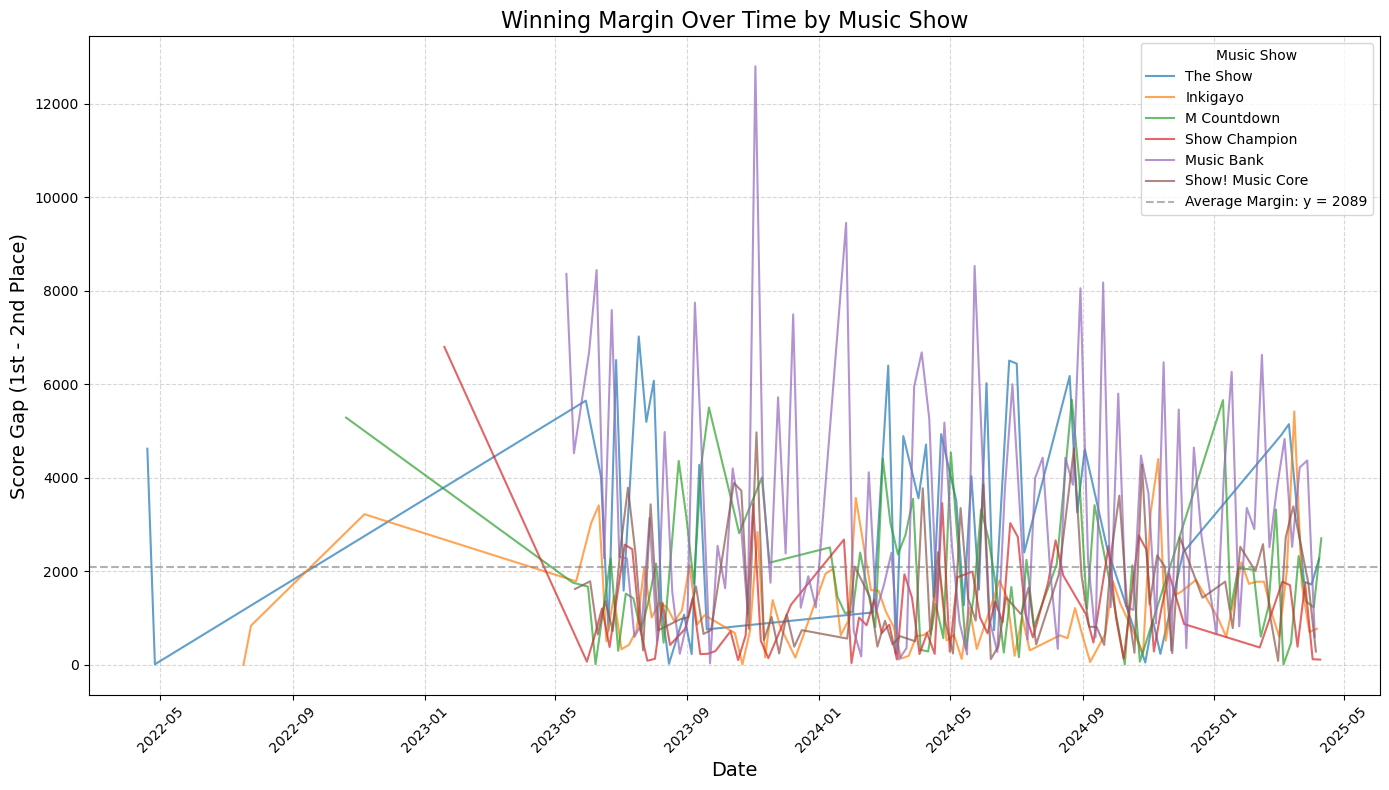

In [20]:
margins_filter = margins[(margins.Gap != 0) & (margins.Second_Total > 0)]

# Plotting
plt.figure(figsize=(14, 8))
sns.lineplot(data=margins_filter, x='Date', y='Gap', hue='Show', palette='tab10', alpha=0.7)

avg_margin = margins_filter['Gap'].mean()
plt.axhline(y=avg_margin, color='gray', linestyle='--', label=f'Average Margin: y = {round(avg_margin)}', alpha=0.6)


plt.title("Winning Margin Over Time by Music Show", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Score Gap (1st - 2nd Place)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Music Show')
plt.tight_layout()
plt.show()

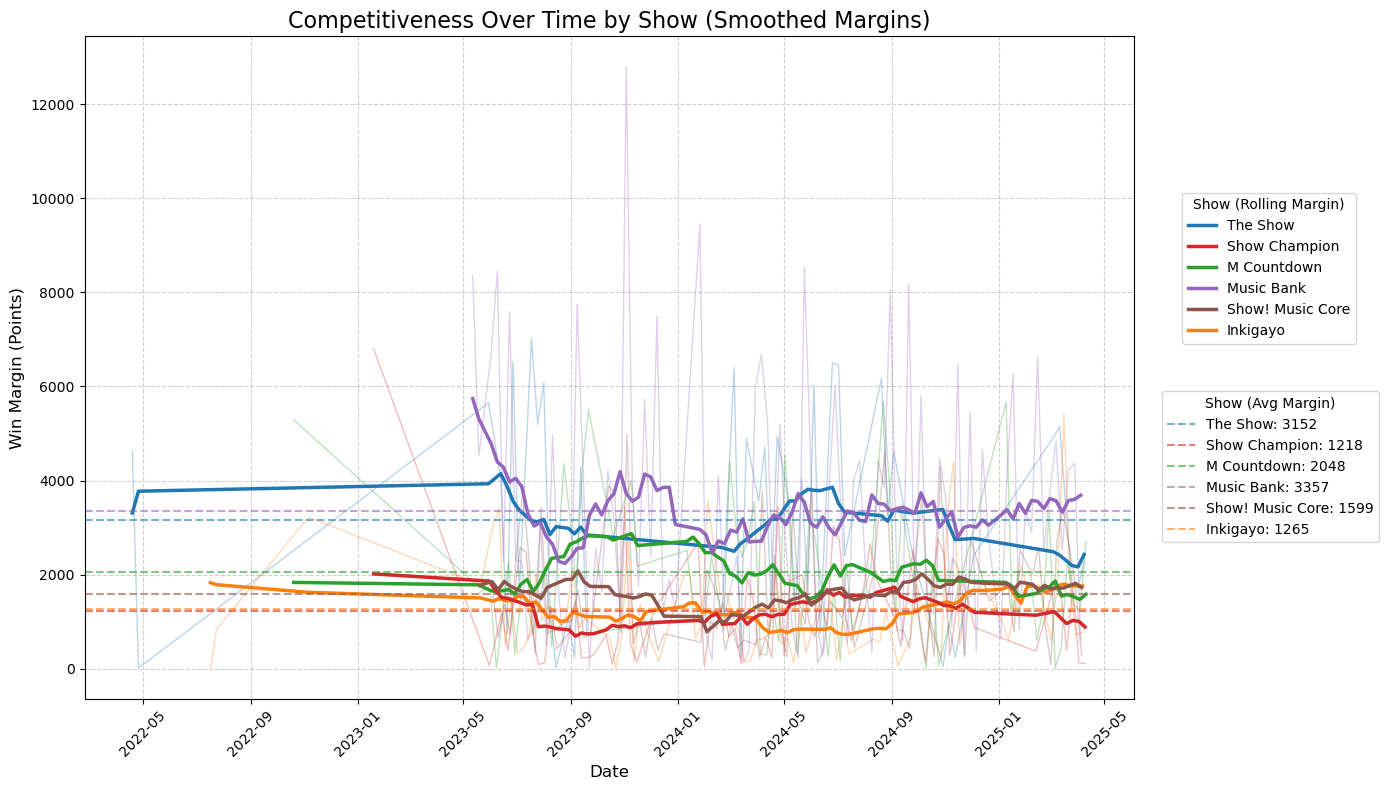

In [21]:
margins_filter = margins[(margins.Gap != 0) & (margins.Second_Total > 0)]
margins_rolling = margins_filter.copy()
margins_rolling['Rolling_Margin'] = (
    margins_rolling
    .sort_values('Date')  # Ensure it's sorted by Date first
    .groupby('Show')['Gap']  # Do rolling separately for each show
    .transform(lambda x: x.rolling(window=14, center=True, min_periods=1).mean())
)

# Plotting
plt.figure(figsize=(14, 8))
palette = sns.color_palette('tab10', n_colors=6)
artist_colors = dict(zip(margins.Show.unique().tolist(), palette))

# 1. Plot normal (spiky) lines
spiky = sns.lineplot(data=margins_rolling, x='Date', y='Gap', hue='Show', palette=artist_colors, linewidth=1, alpha=0.3, legend=False)

# 2. Plot smooth lines
smooth = sns.lineplot(data=margins_rolling, x='Date', y='Rolling_Margin', hue='Show', linewidth=2.5, palette='tab10')

# 3. Save handles for smooth lines (for first legend)
handles1, labels1 = smooth.get_legend_handles_labels()

# 4. Plot the dashed average lines
avg_margin = margins_filter.groupby('Show')['Gap'].mean()
avg_handles = []
avg_labels = []

for i, show in enumerate(avg_margin.index):
    hline = plt.axhline(
        y=avg_margin[show],
        color=artist_colors[show],
        linestyle='--',
        alpha=0.6
    )
    avg_handles.append(hline)
    avg_labels.append(f'{show}: {round(avg_margin[show])}')


plt.title('Competitiveness Over Time by Show (Smoothed Margins)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Win Margin (Points)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# 6. Create first legend for the Rolling Margin lines
first_legend = plt.legend(handles=[handles1[0], handles1[3], handles1[2], handles1[4], handles1[5], handles1[1]], 
                          labels=[labels1[0], labels1[3], labels1[2], labels1[4], labels1[5], labels1[1]], 
                          title='Show (Rolling Margin)', loc='center left', bbox_to_anchor=(1.02, 0.65), borderaxespad=2)
plt.gca().add_artist(first_legend)  # Important: Add manually so second legend doesn't overwrite

# 7. Create second legend for the Average Margin dashed lines
plt.legend(handles=[avg_handles[5], avg_handles[3], avg_handles[1], avg_handles[2], avg_handles[4], avg_handles[0]], 
           labels=[avg_labels[5], avg_labels[3], avg_labels[1], avg_labels[2], avg_labels[4], avg_labels[0]], 
           title='Show (Avg Margin)', loc='center left', bbox_to_anchor=(1.02, 0.35))

plt.tight_layout()

plt.show()

From the two plots above, we can analyze that the competitive nature of award shows on a weekly basis are very volatile. There are high peaks that indicate a blowout victory for the winning team, while low dips represent a highly contested week which represents overlapping comeback releases by artists with large fanbases. In the second plot with the smoothed margins, we can observe that *Show! Music Core* tends to have contested shows despite having several instances of extreme blowouts. 

*Inkigayo* and *Show Champion* have the top 2 most contested margins among all of the music award shows. *Inkigayo* typically scores collects their chart data and social media data for songs from two weeks prior to the previous week, broadcasting on Sunday. This program heavily weighs Digital streams and Social Network streams (e.g. Youtube, Twitter), highlighting songs that are performing well on Korea charts and popular in Korea. *Show Champion* broadcasts tend to be on Wednesdays, collecting data from the week prior. Where it differs from *Inkigayo* is how 40% of its score is attributed to pre-voting by the fans and 30% by digital streams. Additionally, *Show Champion* is a smaller show compared to *Inkigayo*, which is a larger music program; thus, we typically witness smaller artists attending/winning *Show Champion* while larger programs tend to attract groups with larger fanbases.

Lastly, I would like to analyze head to head matchups and discover some of the tightest scoring music show episodes from 2022 to 2025.

In [22]:
closest_margins = margins_filter.copy()[margins_filter.Gap <= 1000].sort_values('Gap').reset_index(drop=True)

Below, we can see some of the closest matchups we have seen since 2022. Some interesting relationships that we can observe are the duels between Solo Artists vs. Groups, Older Generation Artists vs. Newer Generation Artists, and even inter-Generation matchups. On the note of inter-Generation matchups, I find it interesting that we have already witnessed some close matchups between 5th generation groups in KISS OF LIFE vs. tripleS (girl groups) and EVNNE vs. TWS (boy groups) along with battles between some of the most winningest groups in STRAY KIDS vs. (G)I-DLE. 

There are two special matchups that I personally find amazing. The first instance (which isn't shown in the table) is when Aespa was competing against...Aespa. This situation occurred during the promotional period for both *Supernova* and *Armageddon*, which took the Kpop community and the charts by storm as evidenced by the *Top 5 Girl Group Wins* plot. Another instance of an artist competing against themselves that comes to mind is New Jeans with *Super Shy* and *ETA*. This isn't a common occurrence in the realm of music shows but when it does happen, it tends to define an era of dominance for an artist that garners tons of public reception and hardward to go along with it.

My personal favorite matchup that we **can** see in the table below is when *Jo Yuri* being matched up against her ex-Izone leader *Kwon Eunbi*. It is quite impressive that the timing for both of the ex-Izone members' comebacks to be aligned so perfectly, but that two solo artists found themselves competing for this win. Given how high both songs were scored and how small the gap between them was, I would say that the Izone fandom is still alive and living through each member who has redebuted either solo or with a group. 

In [23]:
closest_margins.head(15)

,Show,Date,First_Artist,First_Song,First_Total,Second_Artist,Second_Song,Second_Total,Gap
0,Inkigayo,2022-07-17,IVE,LOVE DIVE,5955,Nayeon,POP!,5952,3
1,M Countdown,2025-03-06,G-Dragon,TOO BAD (feat. Anderson Paak),6687,ZEROBASEONE,BLUE,6679,8
2,M Countdown,2024-10-10,QWER,My Name Is Malgeum,6118,YEONJUN,GGUM,6108,10
3,Inkigayo,2023-10-22,AKMU,Love Lee,6278,JENNIE,You & Me,6267,11
4,The Show,2022-04-26,Dreamcatcher,MAISON,7914,DKZ,Cupid,7900,14
5,M Countdown,2023-06-08,STRAY KIDS,S-Class,6720,(G)I-DLE,Queencard,6705,15
6,The Show,2023-08-15,Jo Yu-ri,TAXI,7173,Kwon Eun-bi,The Flash,7150,23
7,Music Bank,2023-09-22,V,Slow Dancing,6587,Cravity,Ready Or Not,6553,34
8,Show Champion,2024-01-31,EVNNE,UGLY,4802,TWS,plot twist,4761,41
9,The Show,2024-10-29,KISS OF LIFE,Get Loud,6552,tripleS,Hit the Floor,6500,52


In [24]:
from collections import Counter

closest_h2h_counter = Counter(zip(closest_margins.First_Artist, closest_margins.Second_Artist))
closest_h2h_counter.update(zip(closest_margins.Second_Artist, closest_margins.First_Artist))

# Normalize the pairs by sorting the artist names in each tuple
normalized_closest_counter = Counter()
for (artist1, artist2), count in closest_h2h_counter.items():
    # Sort the pair so the order doesn't matter
    normalized_pair = tuple(sorted((artist1, artist2)))
    normalized_closest_counter[normalized_pair] = count
print(normalized_closest_counter.most_common(10))

closest_artist_counter = Counter(closest_margins.First_Artist)
closest_artist_counter.update(closest_margins.Second_Artist)
print(closest_artist_counter.most_common(10))

[(('BIBI', 'LE SSERAFIM'), 5), (('(G)I-DLE', 'STRAY KIDS'), 4), (('Jung Kook', 'NewJeans'), 4), (('NewJeans', 'aespa'), 3), (('IVE', 'JENNIE'), 3), (('ILLIT', 'TOMORROW X TOGETHER'), 3), (('QWER', 'YEONJUN'), 2), (('EVNNE', 'TWS'), 2), (('ROSE', 'SEVENTEEN'), 2), (('SEVENTEEN', 'Zico'), 2)]
[('NewJeans', 19), ('aespa', 19), ('IVE', 16), ('LE SSERAFIM', 14), ('(G)I-DLE', 14), ('ILLIT', 12), ('BIBI', 10), ('STRAY KIDS', 9), ('JENNIE', 9), ('Jung Kook', 9)]


In [25]:
overall_h2h_counter = Counter(zip(margins.First_Artist, margins.Second_Artist))
overall_h2h_counter.update(zip(margins.Second_Artist, margins.First_Artist))

# Normalize the pairs by sorting the artist names in each tuple
normalized_h2h_counter = Counter()
for (artist1, artist2), count in overall_h2h_counter.items():
    # Sort the pair so the order doesn't matter
    normalized_pair = tuple(sorted((artist1, artist2)))
    normalized_h2h_counter[normalized_pair] = count

print(normalized_h2h_counter.most_common(15))

[(('Jung Kook', 'NewJeans'), 12), (('NewJeans', 'aespa'), 10), (('BIBI', 'LE SSERAFIM'), 8), (('(G)I-DLE', 'STRAY KIDS'), 7), (('IVE', 'SEVENTEEN'), 7), (('LE SSERAFIM', 'aespa'), 6), (('(G)I-DLE', 'IU'), 6), (('ILLIT', 'TOMORROW X TOGETHER'), 5), (('NCT 127', 'STRAY KIDS'), 5), (('ROSE', 'aespa'), 5), (('NewJeans', 'NewJeans'), 4), (('IVE', 'JENNIE'), 4), (('BOYNEXTDOOR', 'ILLIT'), 4), (('IVE', 'PLAVE'), 4), (('G-Dragon', 'ZEROBASEONE'), 4)]


In [26]:
song_h2h_counter = Counter(zip(
    zip(margins.First_Artist, margins.First_Song), 
    zip(margins.Second_Artist, margins.Second_Song)
    ))
song_h2h_counter.update(zip(
    zip(margins.Second_Artist, margins.Second_Song),
    zip(margins.First_Artist, margins.First_Song)
    ))

normalized_song_h2h_counter = Counter()
for (artist_song1, artist_song2), count in song_h2h_counter.items():
    normalized_pair = tuple(sorted((artist_song1, artist_song2)))
    normalized_song_h2h_counter[normalized_pair] = count

print(normalized_song_h2h_counter.most_common(15))

[((('Jung Kook', 'Seven (feat. Latto)'), ('NewJeans', 'Super Shy')), 11), ((('BIBI', 'Bam Yang Gang'), ('LE SSERAFIM', 'EASY')), 8), ((('NewJeans', 'How Sweet'), ('aespa', 'Armageddon')), 6), ((('(G)I-DLE', 'Queencard'), ('STRAY KIDS', 'S-Class')), 5), ((('(G)I-DLE', 'Super Lady'), ('IU', 'Love wins all')), 5), ((('ILLIT', 'Magnetic'), ('TOMORROW X TOGETHER', 'Deja Vu')), 5), ((('NCT 127', 'Walk'), ('STRAY KIDS', 'Chk Chk Boom')), 5), ((('ROSE', 'APT (with Bruno Mars)'), ('aespa', 'Whiplash')), 5), ((('LE SSERAFIM', 'UNFORGIVEN (Feat. Nile Rodgers)'), ('aespa', 'Spicy')), 4), ((('IVE', 'Baddie'), ('SEVENTEEN', 'God of Music')), 4), ((('BOYNEXTDOOR', 'Earth, Wind & Fire'), ('ILLIT', 'Magnetic')), 4), ((('NewJeans', 'How Sweet'), ('aespa', 'Supernova')), 4), ((('G-Dragon', 'TOO BAD (feat. Anderson Paak)'), ('ZEROBASEONE', 'BLUE')), 4), ((('Jung Kook', '3D'), ('NCT 127', 'Fact Check')), 3), ((('ILLIT', 'Magnetic'), ('NCT DREAM', 'Smoothie')), 3)]


The lists above depict how often artists would be matched up with any given artist and even details the songs that were most contested by. Particularly, we can see that the more popular, well-known artists would be contested by other popular artists. 

NewJeans often went head to head with tough competitions, having to compete with artists like Jung Kook during his SEVEN era (2023) and Aespa in their Armageddon era (2024). Another notable artist/song that was highly contested during its promotional period was ILLIT's debut single Magnetic, competing against the likes of TOMORROW X TOGETHER, NCT DREAM, and BOYNEXTDOOR.